In [63]:
import pandas as pd

import pandas as pd
# reading csv files
data =  pd.read_csv('iris.data', sep=",", names=['sepal_length' , 'sepal_width', 'petal_length', 'petal_width','class'])
data.head()




,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


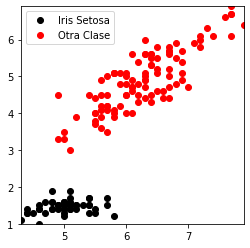

In [65]:

import matplotlib.pyplot as plt

s_l = data['sepal_length']
s_w = data['sepal_width']
p_l = data['petal_length']
p_w = data['petal_width']
Y = data['class']

Iris_Setosa = Y == 'Iris-setosa' #  máscara
Otra_clase = Y != 'Iris-setosa' # máscara

#-- Graficamos los puntos con sus correspondientes clases
fig = plt.figure(figsize=(4,4))
plt.plot(s_l[Iris_Setosa],p_l[Iris_Setosa],'o', c='black', label='Iris Setosa')
plt.plot(s_l[Otra_clase],p_l[Otra_clase],'o', c='red', label='Otra Clase')
plt.xlim(np.min(s_l),np.max(s_l))
plt.ylim(np.min(p_l),np.max(p_l))
plt.legend()
plt.show()

In [66]:
#-- Definimos nuestra función de activación, en este caso usamos un Sigmoide
def act(z):
  return 1/(1 + np.exp(-z))

Epoch [1/15], bias: -0.5, w1: -3.5, w2: -2.35
Epoch [2/15], bias: 0.0, w1: -2.0, w2: -3.3000000000000003
Epoch [3/15], bias: 0.5, w1: -0.5, w2: -4.250000000000001
Epoch [4/15], bias: 0.5, w1: -0.8000000000000003, w2: -5.300000000000001
Epoch [5/15], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [6/15], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [7/15], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [8/15], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [9/15], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [10/15], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [11/15], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [12/15], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [13/15], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [14/15], bias: 1.0, w1: 1.7499999999999996, w2: -4.6000000000000005
Epoch [15/15], bias: 1.0, w1:

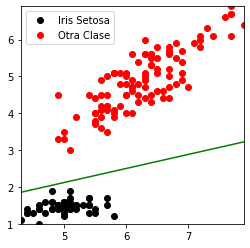

In [157]:
#-- Definimos el Perceptron

# Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

# Inicializamos el número de épocas y la rata de aprendizaje
n_epochs = 15 # Número de épocas
n = 0.5      # Tasa de aprendizaje

# Esta es la función nuestro perceptron encontrará al final de todas las épocas
def y(x):
 return -(b + w_1*x)/w_2


# Entrenamos el Perceptron
for epoch in range(n_epochs):
  for i,j,k in zip(s_l,p_l,Y):
    
    # Función de Suma
    z = i*w_1 + j*w_2 + b

    # Función de Activación
    sig_z = act(z)

    # Evaluamos la salida (output)
    if sig_z >= 0.5:
      out = 1
    if sig_z < 0.5:
      out = 0

    # volvemos numerico Y
    if k == 'Iris-setosa':
      k_err = 1
      
    if k!= 'Iris-setosa':
      k_err = 0
    
    # Calculamos el error
    error = k_err - out

    # Actualizamos los pesos
    b = b + n*error
    w_1 += n*error*i
    w_2 += n*error*j

  print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

fig = plt.figure(figsize=(4,4))
plt.plot(s_l[Iris_Setosa],p_l[Iris_Setosa],'o', c='black', label='Iris Setosa')
plt.plot(s_l[Otra_clase],p_l[Otra_clase],'o', c='red', label='Otra Clase')
plt.plot(np.sort(s_l),y(np.sort(s_l)),'-', c='green',)
plt.xlim(np.min(s_l),np.max(s_l))
plt.ylim(np.min(p_l),np.max(p_l))
plt.legend()
plt.show()

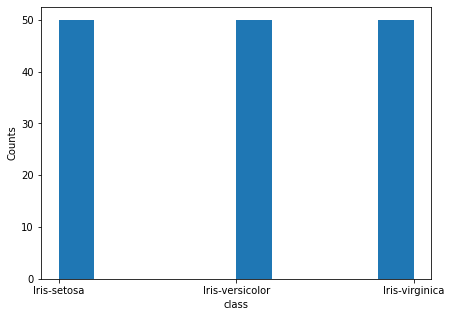

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

In [158]:
X=data[keys]

fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('class')
plt.show()

Y.value_counts()

In [174]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['Iris-setosa','Iris-versicolor', 
                                      'Iris-virginica']])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(data[['class']])
data['class-encoded'] = encoder.transform(data[['class']])


# Iris-setosa        ==> 0.
# Iris-versicolor  ==> 1.
# Iris-virginica     == 2.

data.head()


,sepal_length,sepal_width,petal_length,petal_width,class,class-encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [160]:
#--- Dividimos nuestro dataset en Train/Test

from sklearn.model_selection import train_test_split

Y_code=data['class-encoded']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y_code)



In [161]:
#--- Cargamos MLPCLassifier para buscar un modelo

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(4, 4), solver='adam', learning_rate_init=0.1, random_state=0)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [162]:
#--- Entrenamos el modelo y realizamos una predicción

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [163]:
Y_pred

array([0., 1., 0., 0., 2., 2., 2., 1., 1., 2., 1., 1., 0., 0., 0., 2., 2.,
       2., 1., 0., 1., 2., 2., 0., 0., 0., 0., 2., 2., 1., 1., 2., 2., 0.,
       1., 1., 2., 1.])

In [164]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_test)

0.9736842105263158

In [165]:
# ahora con 3 capas

#--- Cargamos MLPCLassifier para buscar un modelo

from sklearn.neural_network import MLPClassifier

model_3 = MLPClassifier(activation='relu',  hidden_layer_sizes=(4, 4, 4), solver='adam', learning_rate_init=0.1, random_state=1)
model_3

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4, 4), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [166]:
#--- Entrenamos el modelo y realizamos una predicción

model_3.fit(X_train,Y_train)
Y_pred_3 = model_3.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [167]:
Y_pred_3

array([0., 1., 0., 0., 2., 2., 2., 1., 1., 2., 1., 1., 0., 0., 0., 2., 2.,
       2., 1., 0., 1., 2., 2., 0., 0., 0., 0., 2., 2., 1., 1., 2., 2., 0.,
       1., 1., 2., 1.])

In [168]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred_3,Y_test)

0.9736842105263158